## Scipy: parado sobre hombros de gigantes
La biblioteca Scipy se basa en los arrays multidimensionales de Numpy e implementa cientos de algoritmos científicos de alto nivel, clasificados en subpaquetes temáticos.

* Integración y ecuaciones diferenciales ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimización ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolación ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformada de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Procesamiento de señales ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Álgebra lineal (mejor que `numpy.linalg`) ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Algoritmos optimizados para matrices raras ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Estadística ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesamiento de imágenes ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Entrada/salida de archivos ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))
* Funciones especiales ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))

y hay más! Toda la documentación en http://docs.scipy.org/doc/scipy/reference/

## Scipy: parado sobre hombros de gigantes

La biblioteca Scipy se basa en los arrays multidimensionales de Numpy e implementa cientos de algoritmos científicos de alto nivel, clasificados en subpaquetes temáticos.


* Integración y ecuaciones diferenciales ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimización ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolación ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformada de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Procesamiento de señales ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Álgebra lineal (mejor que `numpy.linalg`) ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Algoritmos optimizados para matrices ralas ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Estadística ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesamiento de imágenes ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Entrada/salida de archivos ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))
* Funciones especiales ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))

y hay más! Toda la documentación en http://docs.scipy.org/doc/scipy/reference/

Veamos algunas aplicaciones


## Integrales

La evaluación numérica de integrales de la forma

$\displaystyle \int_a^b f(x) dx$

se llaman *cuadratura numérica*, o simplemente *cuadratura*. SciPy tiene las funciones  `quad`, `dblquad` y `tplquad` para cuadraturas simples, dobles o triples.

In [2]:
from scipy.integrate import quad

# definimos f f(x)
def f(x):
    return 2*x

In [3]:
val, abserr = quad(f, 0, 3)
print("integral value =", val, ", absolute error =", abserr)

integral value = 9.0 , absolute error = 9.992007221626409e-14


Ya que estamos definiendo "funciones objetivo", hay otra manera de definir funciones simples en python, que sólo si queremos las asignamos a un nombre. 
Por ejemplo 

```python
def f(x): 
    return x+2
```

se podría definir así

Lo útil es que esta forma de crear **funciones anónimas** permite definirlas directamente al pasarla como argumento

In [4]:
quad(lambda x: x**2, 0, 3)

(9.000000000000002, 9.992007221626411e-14)

### Ecuaciones diferenciales ordinarias

El paquete de integración también tiene funciones para resolver [ecuaciones diferenciales ordinarias](https://en.wikipedia.org/wiki/Ordinary_differential_equation).

Por ejemplo, para resolver 

$$\frac{\mathrm{d}y}{\mathrm{d}t} = -2y$$

 con $t  \in [-1, 5]$  y la condición inicial $y(0) = 1$ 

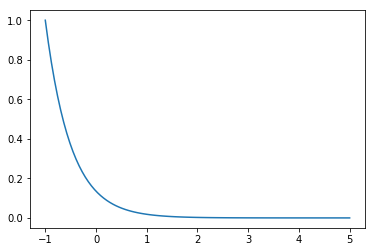

In [6]:
%matplotlib inline 

from matplotlib import pyplot as plt
import numpy as np

from scipy.integrate import odeint

t = np.linspace(-1, 5, 100)
y = odeint(lambda y,t: -2*y, 1, t)
plt.plot(t,y)

Como vemos, [el resultado es correcto](http://www.wolframalpha.com/input/?i=y%27+%3D+-2y)

## Optimización y ajuste de curvas

### encontrar mínimos

Supongamos que tenemos una función cualquiera de una o más variables


In [7]:
def fpol(x):
    return x**4 + 5*x**3 + (x-2)**2

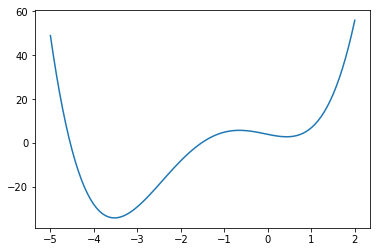

In [8]:
fig, ax  = plt.subplots()
x = np.linspace(-5, 2, 100)
ax.plot(x, fpol(x));

Podemos encontrar un mínimo local con la función `minimize`, que recibe como parámetro la función objetivo y un *valor de estimación inicial* a partir del cual se comienza a "ajustar"

In [9]:
from scipy import optimize
result = optimize.minimize(fpol, -3, method='BFGS') # http://en.wikipedia.org/wiki/BFGS
result

      fun: -34.080053933779155
 hess_inv: array([[ 0.02197703]])
      jac: array([ -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([-3.52792852])

In [10]:
result['x']

array([-3.52792852])

`minimize` es una "función paraguas" para diferentes algoritmos, que se pueden elegir mediante el parámetro `method` o bien utilizar la función explícita de minimización que lo implementa.


In [12]:
optimize.minimize(fpol, 0, method='Powell')['x']

array(-3.5279319661864816)

#### Ejercicio 

1. Encuentre el mínimo y el máximo de la función 

$$f(x,y) = xe^{-x^2 - y^2}$$

2- Basado en los ejemplos de gráficos de [superficie](http://matplotlib.org/examples/mplot3d/surface3d_demo.html), y [scatter 3d](http://matplotlib.org/examples/mplot3d/scatter3d_demo.html) grafique la superficie para $x, y \in [(-2, 2),(-2,2)]$ con un punto triangular en los puntos encontrados anteriormente

<!-- 
https://gist.githubusercontent.com/mgaitan/faa930a5874311a6f888/raw/ec7ff8268935ab53095c3067c12210d26c40b406/min_and_max.py

-->

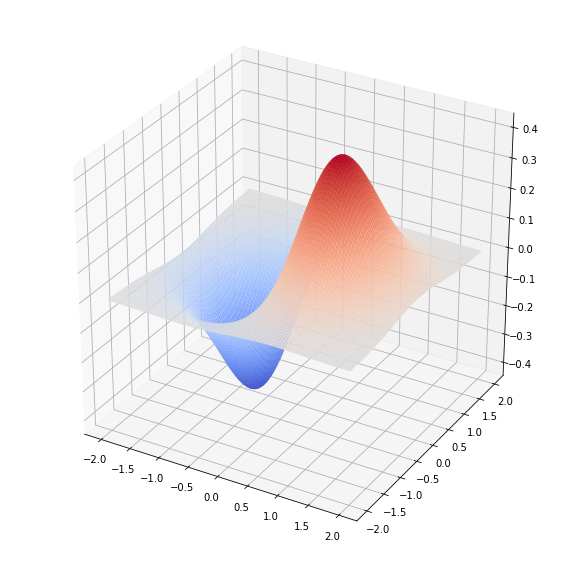

In [13]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x = y = np.linspace(2, -2, 100)
xx,yy = np.meshgrid(x, y)

f = lambda var: var[0]*np.exp(-var[1]**2 - var[0]**2)

z = f([xx,yy])

fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.gca(projection='3d')
ax.plot_surface(xx,yy,z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0)

In [15]:

from scipy import optimize
minimum = optimize.minimize(f, [-1, 1])
maximum = optimize.minimize(lambda x: -f(x), [1, 1])
minimum, maximum

(      fun: -0.4288819424702332
 hess_inv: array([[ 0.58466953,  0.00264014],
       [ 0.00264014,  1.23713572]])
      jac: array([ -9.35047865e-07,   4.11644578e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([ -7.07107333e-01,   4.79459973e-06]),
       fun: -0.42888194247027345
 hess_inv: array([[ 0.58466917, -0.00263893],
       [-0.00263893,  1.23713593]])
      jac: array([  9.38773155e-07,   4.10899520e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([  7.07107319e-01,   4.78787551e-06]))

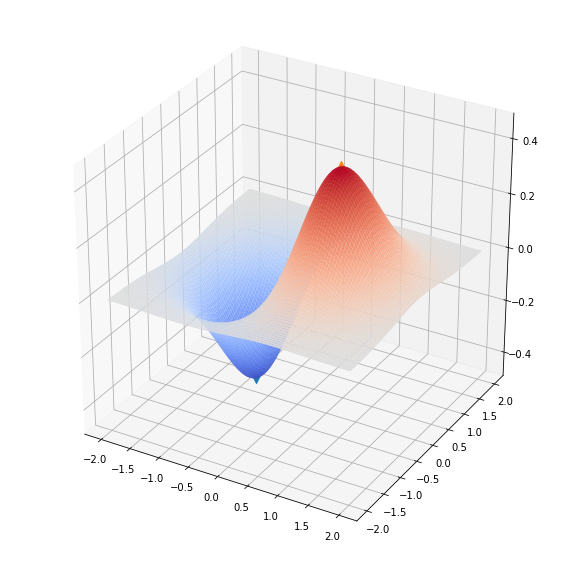

In [16]:
ax.scatter(minimum['x'][0], minimum['x'][1], minimum['fun'], marker='v', s=200)
ax.scatter(maximum['x'][0], maximum['x'][1], f(maximum['x']), marker='^', s=200)
fig

### Curve fitting


Otra tarea frecuente es ajustar parámetros de una función objetivo a partir de un *dataset* de puntos conocidos. 

Supongamos que tenemos una serie de datos medidos



In [17]:
dataset = np.array([[ 0.        ,  3.07127661],
                   [ 0.08163265,  2.55730445],
                   [ 0.16326531,  2.28438915],
                   [ 0.24489796,  1.91475822],
                   [ 0.32653061,  2.00380351],
                   [ 0.40816327,  1.89419135],
                   [ 0.48979592,  1.74713349],
                   [ 0.57142857,  1.68237822],
                   [ 0.65306122,  1.44749977],
                   [ 0.73469388,  1.67511522],
                   [ 0.81632653,  1.34023054],
                   [ 0.89795918,  1.1209472 ],
                   [ 0.97959184,  1.41692478],
                   [ 1.06122449,  0.88480583],
                   [ 1.14285714,  0.9939094 ],
                   [ 1.2244898 ,  1.02293629],
                   [ 1.30612245,  1.11983417],
                   [ 1.3877551 ,  0.77520734],
                   [ 1.46938776,  0.88371884],
                   [ 1.55102041,  1.24492445],
                   [ 1.63265306,  0.8275613 ],
                   [ 1.71428571,  0.60846983],
                   [ 1.79591837,  0.73019407],
                   [ 1.87755102,  0.75139707],
                   [ 1.95918367,  0.6496137 ],
                   [ 2.04081633,  0.59122461],
                   [ 2.12244898,  0.61734269],
                   [ 2.20408163,  0.61890166],
                   [ 2.28571429,  0.68647436],
                   [ 2.36734694,  0.47551378],
                   [ 2.44897959,  0.89850013],
                   [ 2.53061224,  0.53029377],
                   [ 2.6122449 ,  0.74853936],
                   [ 2.69387755,  0.371923  ],
                   [ 2.7755102 ,  0.43536233],
                   [ 2.85714286,  0.40515777],
                   [ 2.93877551,  0.52171142],
                   [ 3.02040816,  0.53069869],
                   [ 3.10204082,  0.71363042],
                   [ 3.18367347,  0.54962316],
                   [ 3.26530612,  0.7133841 ],
                   [ 3.34693878,  0.27204244],
                   [ 3.42857143,  0.56572211],
                   [ 3.51020408,  0.29310287],
                   [ 3.59183673,  0.50044492],
                   [ 3.67346939,  0.60938301],
                   [ 3.75510204,  0.55696286],
                   [ 3.83673469,  0.59409416],
                   [ 3.91836735,  0.30335525],
                   [ 4.        ,  0.24230362]]
                  )

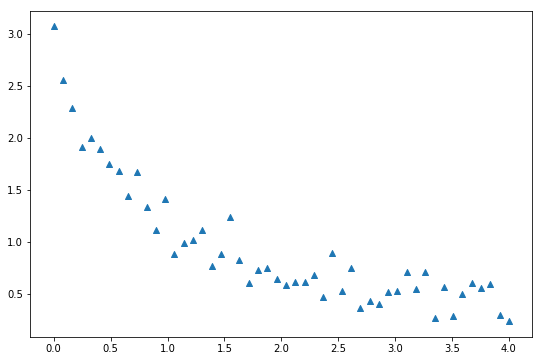

In [18]:
x, y =  dataset[:,0], dataset[:,1]

fig  = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(dataset[:,0], dataset[:,1], marker='^');

Vemos que tiene forma de exponencial decreciente, es decir

$$
    f(x) = ae^{-bx} + c
$$

El objetivo es encontrar cuales son los valores de los parámetros `a`, `b` y `c` que mejor ajustan la curva a los puntos dados. 


In [19]:
def func(x, a, b, c):   # x es la variable independiente, a b y c los parametros a encontrar
    return a*np.exp(-b*x) + c


popt, pcov = optimize.curve_fit(func, x, y)
popt

array([ 2.33669513,  1.18115484,  0.45555214])

Por lo tanto la curva que mejor ajusta a nuestros datos es

$$f(x) = 2.33e^{-1.18x} + 0.25$$

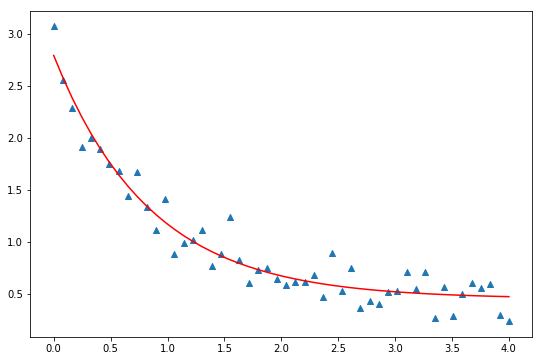

In [20]:
ax.plot(x, func(x, *popt), 'r', label='fitted')
fig

## Seaborn

Antes de empezar con pandas vamos a configurar [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html), un paquete que, entre otras cosas, mejora la estética de gráficos de matplotlib

Para instalar, como casi siempre

    conda install seaborn
      
o 

    pip install seaborn

Veamos un gráfico default generado por matplotlib

In [85]:
import matplotlib.pyplot as plt
import numpy as np

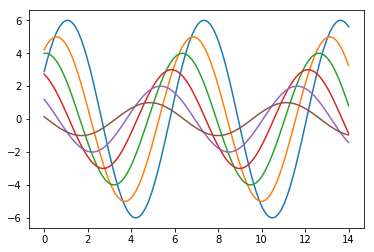

In [86]:
def sinplot():
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))
        
sinplot()

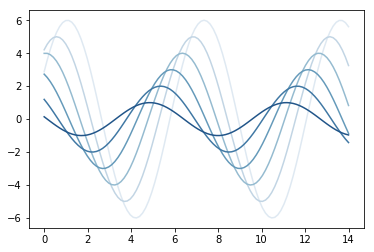

In [90]:
with sns.color_palette("Blues", desat=.7):
    sinplot()

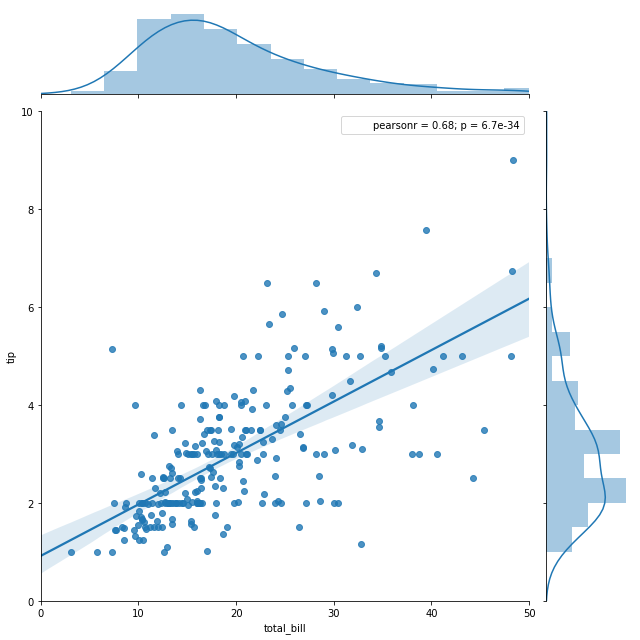

In [91]:
tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg", xlim=(0, 50), ylim=(0, 10), size=9)